In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import folium

plt.rcParams['axes.facecolor'] = 'white'


In [2]:
springfield_overall = pd.read_csv("springfield_overall.csv")
springfield_interview = pd.read_csv("springfield_interview.csv")
springfield_combined = pd.read_csv("springfield_combined.csv")

In [5]:
springfield_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   interview_number    6598 non-null   object 
 1   call_number         6593 non-null   object 
 2   date_time_rpt_date  6598 non-null   object 
 3   date_time_rpt_time  6598 non-null   float64
 4   rpt_date_time_date  6598 non-null   object 
 5   rpt_date_time_time  6598 non-null   float64
 6   reporting_officer   6533 non-null   object 
 7   assisting_officer   4885 non-null   object 
 8   location_type       6166 non-null   object 
 9   zone                6130 non-null   object 
 10  street              4044 non-null   object 
 11  city_state          5642 non-null   object 
 12  reason              6184 non-null   object 
 13  entered             5314 non-null   object 
 14  modified            5314 non-null   object 
 15  approved            5314 non-null   object 
dtypes: flo

In [9]:
springfield_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   interview_number    6598 non-null   object 
 1   call_number         6593 non-null   object 
 2   date_time_rpt_date  6598 non-null   object 
 3   date_time_rpt_time  6598 non-null   float64
 4   rpt_date_time_date  6598 non-null   object 
 5   rpt_date_time_time  6598 non-null   float64
 6   reporting_officer   6533 non-null   object 
 7   assisting_officer   4885 non-null   object 
 8   location_type       6166 non-null   object 
 9   zone                6130 non-null   object 
 10  street              4044 non-null   object 
 11  city_state          5642 non-null   object 
 12  reason              6184 non-null   object 
 13  entered             5314 non-null   object 
 14  modified            5314 non-null   object 
 15  approved            5314 non-null   object 
dtypes: flo

In [10]:
springfield_interview.head()

,interview_number,call_number,interviewee_num,tot_num_interviewed,sex,race,age,location,military_active_duty,height,weight,hair,eyes,body,complexion,place_of_birth,ethnicity
0,18-1-FI,18-21,1,2,M,B,18.0,NOT AVAIL 413\n\n SPRINGFIELD MA,N,NaN,NaN,NaN,NaN,NOT,NOT AVAIL.,NOT AVAIL.,NOT HISPANIC
1,18-1-FI,18-21,2,2,M,B,18.0,SPRINGFIELD MA,N,511,195,BLACK,BROWN,SLIM,DARK,LICENSE NUMBER: NOT AVAIL. ...,NOT HISPANIC
2,18-10-FI,18-1733,1,1,M,B,21.0,SPRINGFIELD MA,N,510,NaN,NOT,NOT,SLIM,NOT AVAIL.,NOT AVAIL.,NOT HISPANIC
3,18-100-FI,18-14114,1,1,M,B,40.0,413\n\n SPRINGFIELD MA,N,510,185 - 200,BLACK,BROWN,MEDIUM,DARK BROWN,STATE ID: F...,NOT HISPANIC
4,18-101-FI,18-14157,1,1,M,W,36.0,413-\n\n SPRINGFIELD MA 01108,N,503,130,BLACK,BROWN,MEDIUM,DARK,STATE ID: F...,HISPANIC


In [4]:
springfield_interview['race'].value_counts()

W              4797
B              2184
U                40
A                22
MA               13
I                11
M                 2
P                 1
HILLS             1
SPRINGFIELD       1
Name: race, dtype: int64

In [11]:
springfield_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   interview_number      7310 non-null   object 
 1   call_number           7305 non-null   object 
 2   interviewee_num       7311 non-null   int64  
 3   tot_num_interviewed   7311 non-null   int64  
 4   sex                   7082 non-null   object 
 5   race                  7072 non-null   object 
 6   age                   7002 non-null   float64
 7   location              7039 non-null   object 
 8   military_active_duty  7088 non-null   object 
 9   height                5226 non-null   object 
 10  weight                5211 non-null   object 
 11  hair                  5244 non-null   object 
 12  eyes                  5244 non-null   object 
 13  body                  7089 non-null   object 
 14  complexion            7087 non-null   object 
 15  place_of_birth       

In [7]:
springfield_combined.shape

(7311, 31)

### Ethnicity

In [12]:
springfield_combined['ethnicity'].value_counts()

NOT HISPANIC                                        3635
HISPANIC                                            3331
UNKNOWN                                               91
NOT   HISPANIC                                        25
PCF #:                                 LOCAL ID:       2
LOCAL ID:                                              2
Name: ethnicity, dtype: int64

<AxesSubplot:title={'center':'Ethnicity distribution of FIOs in Springfield'}>

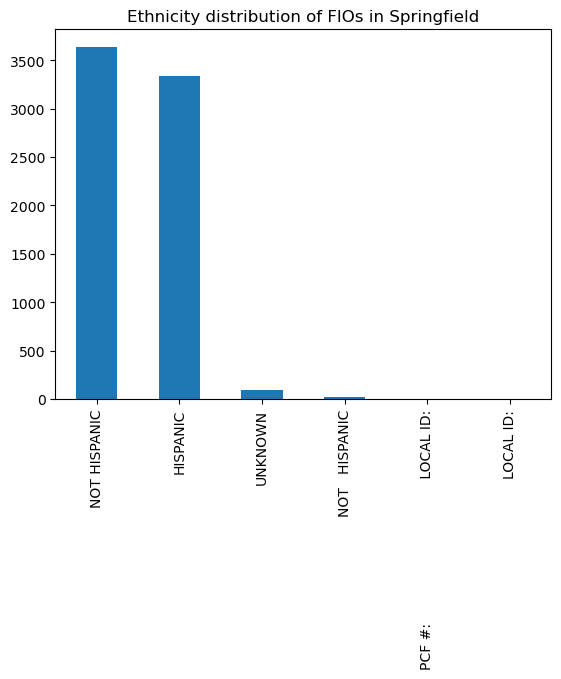

In [26]:
springfield_combined['ethnicity'].value_counts().plot.bar(title='Ethnicity distribution of FIOs in Springfield')

<AxesSubplot:ylabel='None'>

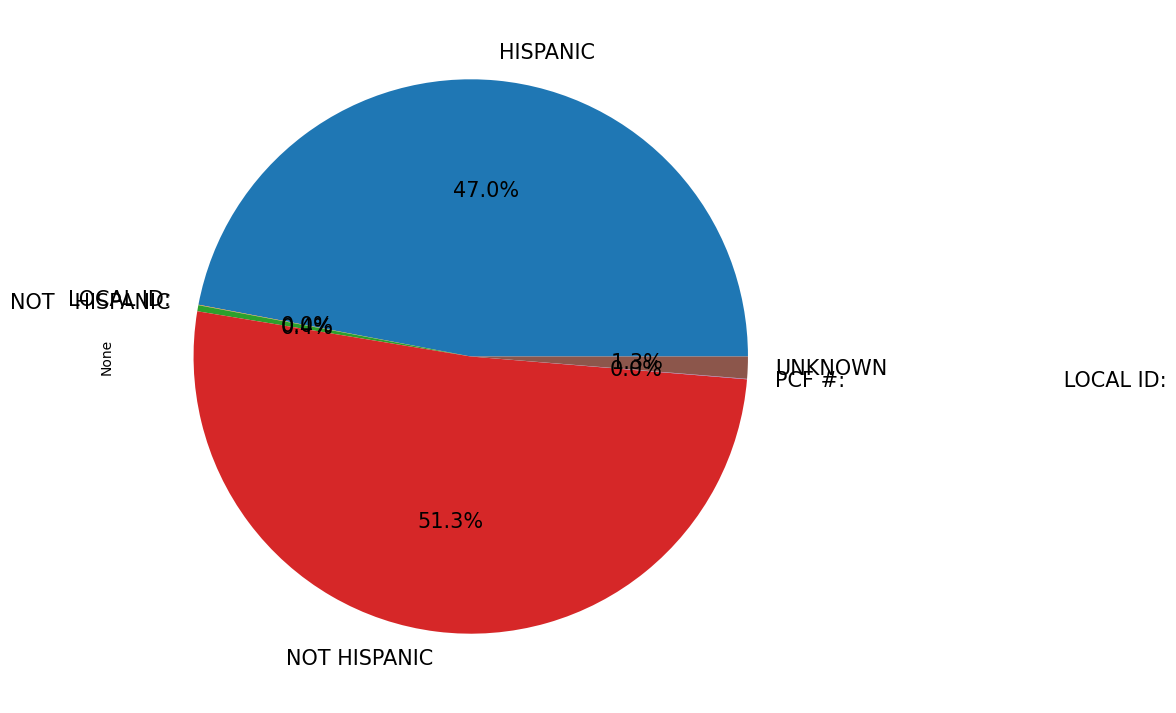

In [15]:
springfield_combined.groupby(by='ethnicity').size().plot.pie(y='ethnicity',figsize=(9, 9),autopct='%.1f%%',fontsize=15)

### Race 

In [17]:
races = springfield_combined['race'].value_counts()
races

W              4797
B              2184
U                40
A                22
MA               13
I                11
M                 2
P                 1
HILLS             1
SPRINGFIELD       1
Name: race, dtype: int64

<AxesSubplot:title={'center':'Race distribution of FIOs in Springfield'}>

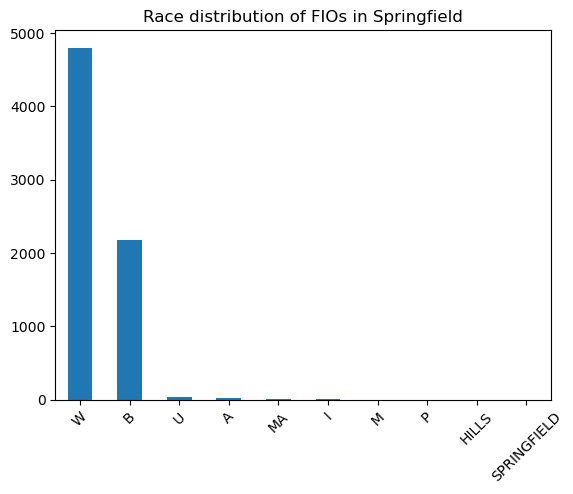

In [28]:
races.plot.bar(title='Race distribution of FIOs in Springfield',rot=45)

### Race - Reason

In [16]:
race_df = springfield_combined[springfield_combined['race'].isin(races.nlargest(2).keys())]
race_df = race_df[race_df['street'].notnull()] # Taking the rows with street non-null

race_df.groupby(by=['race','reason']).size()


race  reason                                                         
B     1    DOMESTIC INCIDENT CFS                                         2
      1    Drug Activity                                                 1
      1    LOITERING                                                     2
      1    MOTOR VEHICLE STOP                                            2
      1    PSYCH BEHAVIOR                                                2
                                                                        ..
W     1   USMC IMPOSTOR/94C ABUSER/MENTAL HEALTH INV. SUBJ.              1
      1   VIO. LIQUOR SALES                                              1
      1   WELL BEING CHECK                                               2
      1   WELL BEING CHECK ON A FEMALE INSIDE A LOCKED FENCED IN AREA    1
      2   Suspicious Activity                                            1
Length: 767, dtype: int64

### Juveniles

In [47]:
juveniles = springfield_combined[springfield_combined['age'] < 18]
juveniles = juveniles[juveniles['age']>0.0]
len(springfield_combined)

7311

<AxesSubplot:title={'center':'Number of FIOs for juveniles by age'}, xlabel='age'>

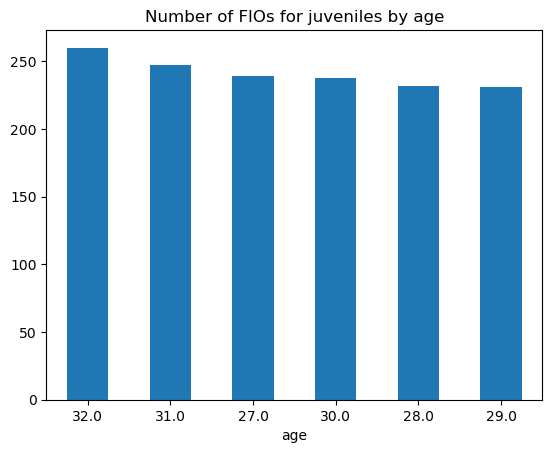

In [43]:
juvenile_distribution = springfield_combined.groupby(by='age').size()
juvenile_distribution.nlargest(6).plot(kind='bar',title='Number of FIOs for juveniles by age (top 6)',rot=0)

<AxesSubplot:title={'center':'Juvenile age distribution by gender in Springfield'}, xlabel='age'>

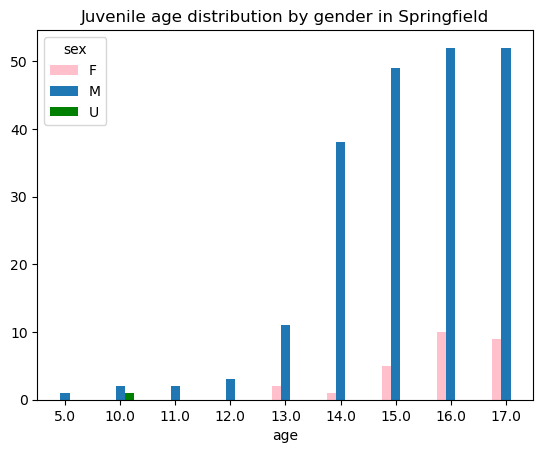

In [45]:
juveniles_genders = juveniles.groupby(by=['age','sex']).size()
juveniles_genders.unstack().plot(kind='bar',rot=0, color=['pink', '#1f77b4', 'green',],title='Juvenile age distribution by gender in Springfield')

### Date

In [76]:
springfield_overall[springfield_overall['entered'].notnull()].isnull().shape

(5314, 16)

/var/folders/wj/by0f7pc57q5bjvglx0k0m9r8009scg/T/ipykernel_80579/854994282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  springfield_nonull['Year'] = springfield_nonull['entered'].apply(lambda x: \


<AxesSubplot:title={'center':'Trend of FIOs since 2018 in Springfield'}>

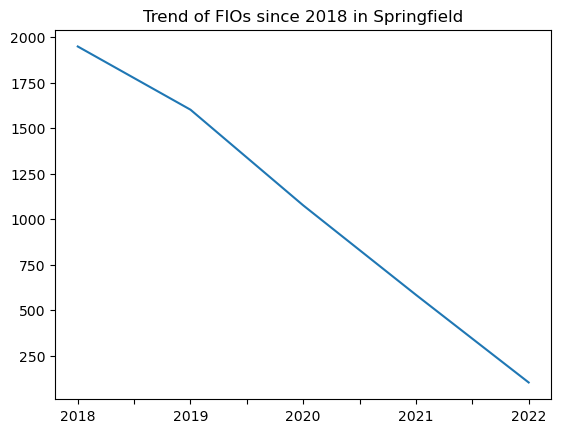

In [74]:
import datetime

springfield_nonull = springfield_overall[springfield_overall['entered'].notnull()]

springfield_nonull['Year'] = springfield_nonull['entered'].apply(lambda x: \
                    datetime.datetime.strptime(x.split(' ')[0], "%m/%d/%Y").strftime("%Y"))

springfield_nonull['Year'].value_counts().plot.line(title='Trend of FIOs since 2018 in Springfield')